In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('seaborn-v0_8-paper')

# **2.1D Random Walk**

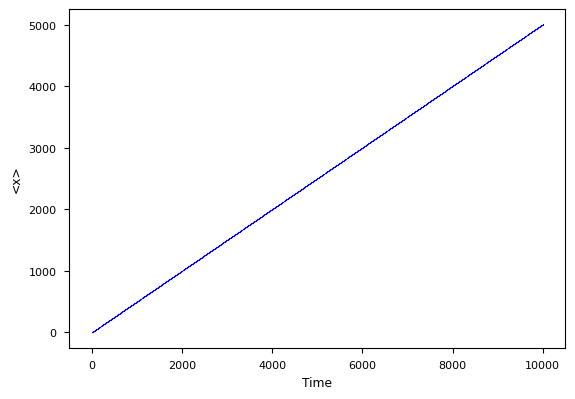

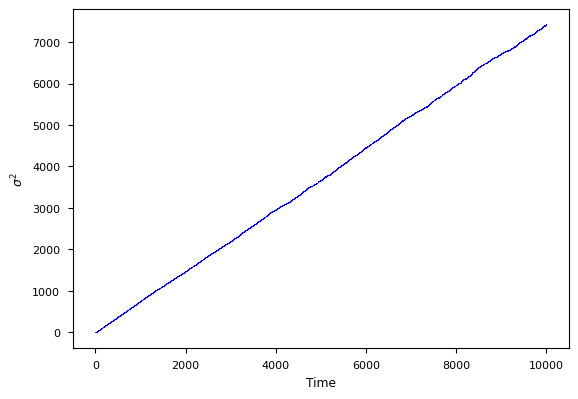

In [ ]:
def random_walk(steps=1000, p=0.5):
  arr = np.random.choice([-1,1], steps, p=[1-p, p])
  arr = np.cumsum(arr)
  return arr

#now lets create 10000 random walks and plot the <x> vs time and \sigma vs time
def calculations(step=1000, walkers=1000, p=0.5):
  xbar = np.zeros(shape = step, dtype= np.float64)
  x2 = np.zeros(shape = step, dtype= np.float64)

  for i in range(walkers):
    arr = random_walk(step, p)
    xbar += arr
    x2 += arr**2

  xbar /= walkers
  sigma = x2/walkers - xbar**2
  return xbar, sigma

step = 10000
xbar, sigma = calculations(step, 10000, 0.75)
time = np.arange(1, step+1)
plt.scatter(time, xbar, c='b', marker='.',s=1)
plt.xlabel('Time')
plt.ylabel('<x>')
plt.show()
plt.scatter(time, sigma, c='b',marker='.',s=1)
plt.xlabel('Time')
plt.ylabel('$\sigma^2$')
plt.show()




In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(time.reshape(-1,1), xbar)
print(f'for P=0.75 slope is {model.coef_[0]}')
#we expect for p=0.75 slope be = 0.75- 0.25 = 0.5

model.fit(time.reshape(-1,1), sigma)
print(f'for P=0.75 slope is {model.coef_[0]}')
#we expect for p=0.75 slope be = 4*0.75*0.25 = 0.75

for P=0.75 slope is 0.5002741036917037
for P=0.75 slope is 0.7457970267702826


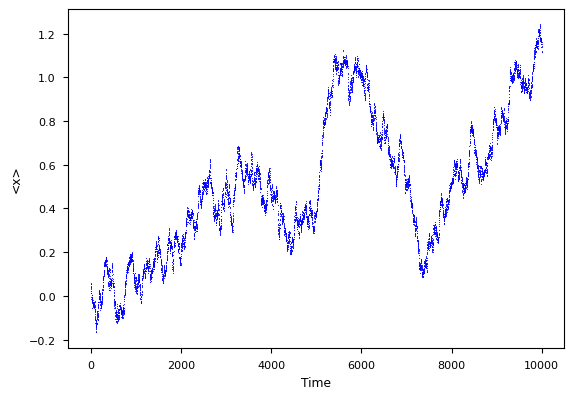

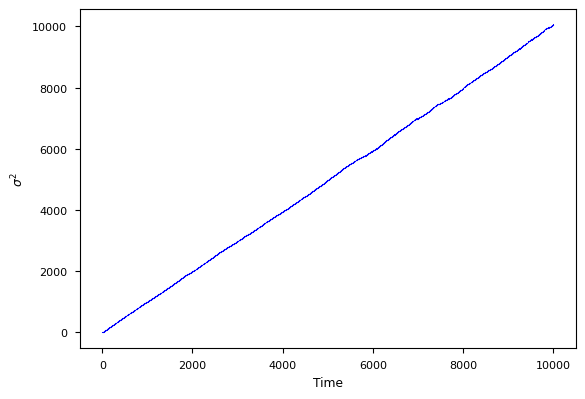

In [ ]:
#now lets see the plots for p=0.5

xbar, sigma = calculations(step, 10000)
time = np.arange(1, step+1)
plt.scatter(time, xbar, c='b', marker='.',s=1)
plt.xlabel('Time')
plt.ylabel('<x>')
plt.show()
plt.scatter(time, sigma, c='b',marker='.',s=1)
plt.xlabel('Time')
plt.ylabel('$\sigma^2$')
plt.show()

In [ ]:
model.fit(time.reshape(-1,1), xbar)
print(f'for P=0.5 slope is {model.coef_[0]}')
#we expect for p=0.5 slope be = 0.5- 0.5=0
model.fit(time.reshape(-1,1),sigma)
print(f'for P=0.5 slope is {model.coef_[0]}')
#we expect for p=0.5 slope be = 4*0.5*0.5=1

for P=0.5 slope is 7.635802222958025e-05
for P=0.5 slope is 1.0019257232169818


# **3.Random Walk with boundry Conditions**

98.5282


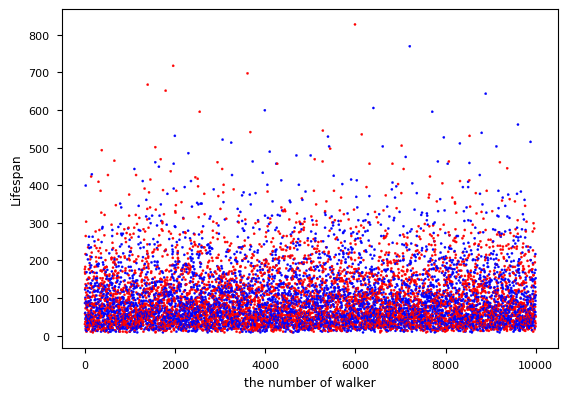

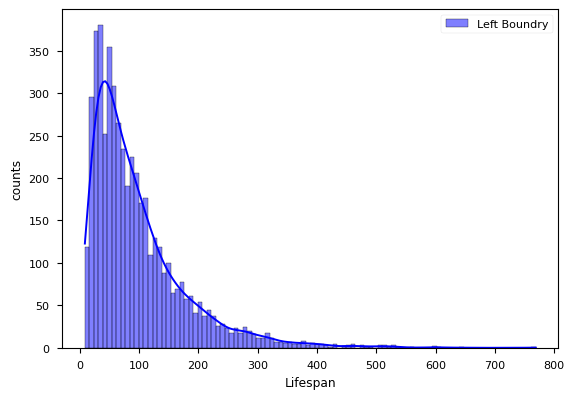

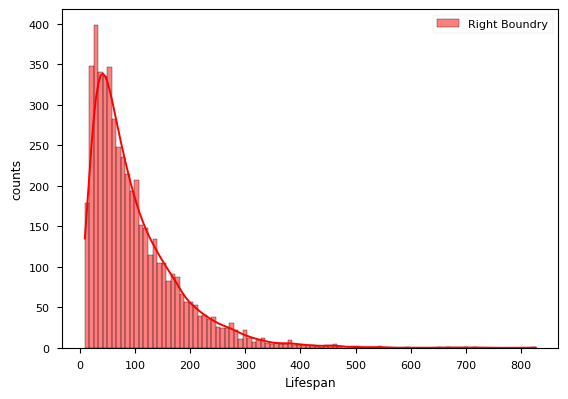

In [ ]:
#here i will use random_walk function again and make anothe function to apply boundry conditions
from matplotlib.colors import ListedColormap
import seaborn as sns

def random_walk_lifespan(steps=10000, walkers=10000, p=0.5, right_boundry= -10, left_boundry=10):
  lifespan = np.zeros(shape=(walkers,2), dtype =np.float64)#saving lifespan and which boundry particle hits.
  for i in range(walkers):
    arr = random_walk(steps,p)
    l = np.argmax(arr == left_boundry) if left_boundry in arr else 999
    r= np.argmax(arr == right_boundry) if right_boundry in arr else 999
    lifespan[i] = [l, -1] if l<r else [r, 1]
  return lifespan[lifespan[:,0]!=999]



steps = 10000
walkers = 10000
lifespan = random_walk_lifespan(steps,walkers)
time = np.arange(1, len(lifespan)+1)
print(np.mean(lifespan[:,0]))#We can 1 to 100 ratio here aswell like was mentioned in the text


cmap = ListedColormap(['b','r'])
plt.scatter(time, lifespan[:,0], c=lifespan[:,1], cmap=cmap, marker='.',s=10)
plt.xlabel('the number of walker')
plt.ylabel('Lifespan')
plt.show()


#for better visualization first i will seperate each particle based on the boundry it hitted then plot its quantiles
left_hit = lifespan[lifespan[:, 1] == -1]
right_hit = lifespan[lifespan[:, 1] == 1]


sns.histplot(left_hit[:, 0], bins=100, kde=True,color='b', label='Left Boundry')
plt.ylabel(ylabel='counts')
plt.xlabel(xlabel='Lifespan')
plt.legend()
plt.show()
sns.histplot(right_hit[:, 0], bins=100, kde=True,color='r', label='Right Boundry')
plt.ylabel(ylabel='counts')
plt.xlabel(xlabel='Lifespan')
plt.legend()
plt.show()

In [ ]:
starting_point = np.arange(-9,10)
avg_lifespan = np.zeros(shape = (len(starting_point)), dtype= np.float64)
probability = []

for i, position in enumerate(starting_point):
  k = 0
  total = 0
  for j in range(10000):#10000 random walk at each starting points
    arr = random_walk(10000) + position
    l = np.where(arr == -10)[0]
    r= np.where(arr ==10)[0]
    first_hit = np.inf
    if len(l) > 0:
        first_hit = min(first_hit, l[0])
    if len(r) > 0:
        first_hit = min(first_hit, r[0])
        if first_hit == r[0]:
          k += 1#number of hitting the right boundry

    if first_hit != np.inf:
      total +=1#number of all hits
      avg_lifespan[i] += first_hit
  avg_lifespan[i] /= total
  probability.append(k/total)





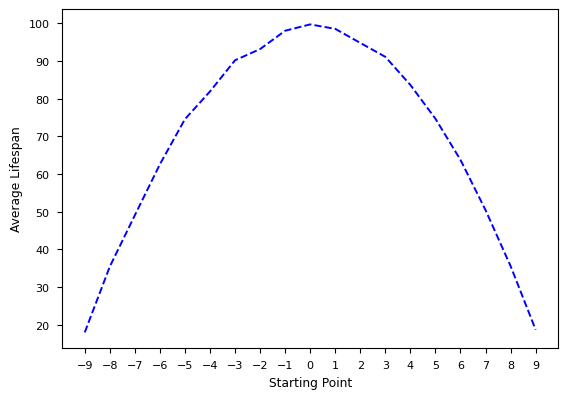

In [ ]:

plt.plot(starting_point, avg_lifespan, c='b',linestyle = '--')
plt.xlabel('Starting Point')
plt.xticks(starting_point)
plt.ylabel('Average Lifespan')
plt.show()

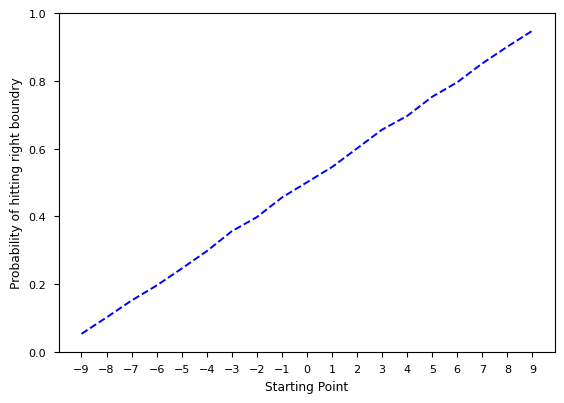

In [ ]:
plt.plot(starting_point, probability, c='b',linestyle = '--')
plt.xlabel('Starting Point')
plt.xticks(starting_point)
plt.yticks(np.linspace(0,1,6))
plt.ylabel('Probability of hitting right boundry')
plt.show()

# **4.Enumeration**

In [ ]:
def probability_tabel(steps=1000, p=0.5, start=0):
  promat = np.zeros(shape = (steps,21),dtype=np.float16)
  promat[0, start+10] = 1#each walker at zero is on the origin or starting point
  q = 1 - p
  for i in range(1,steps):#now lets fill each cell at each step ith values from previouse step like in the text
    for j in range(promat.shape[1]):
      if 1 < j < 19:
        promat[i, j] = promat[i-1, j-1]*p + promat[i-1, j+1]*q
      elif j == 1:
        promat[i ,j] = promat[i-1, j+1]*q
      elif j == 19:
        promat[i, j] = promat[i-1, j-1]*p
      elif j == 0:
        promat[i, j] = promat[i-1, j] + promat[i-1, j+1]*q
      elif j == 20:
        promat[i, j] = promat[i-1, j] + promat[i-1, j-1]*p
  return promat





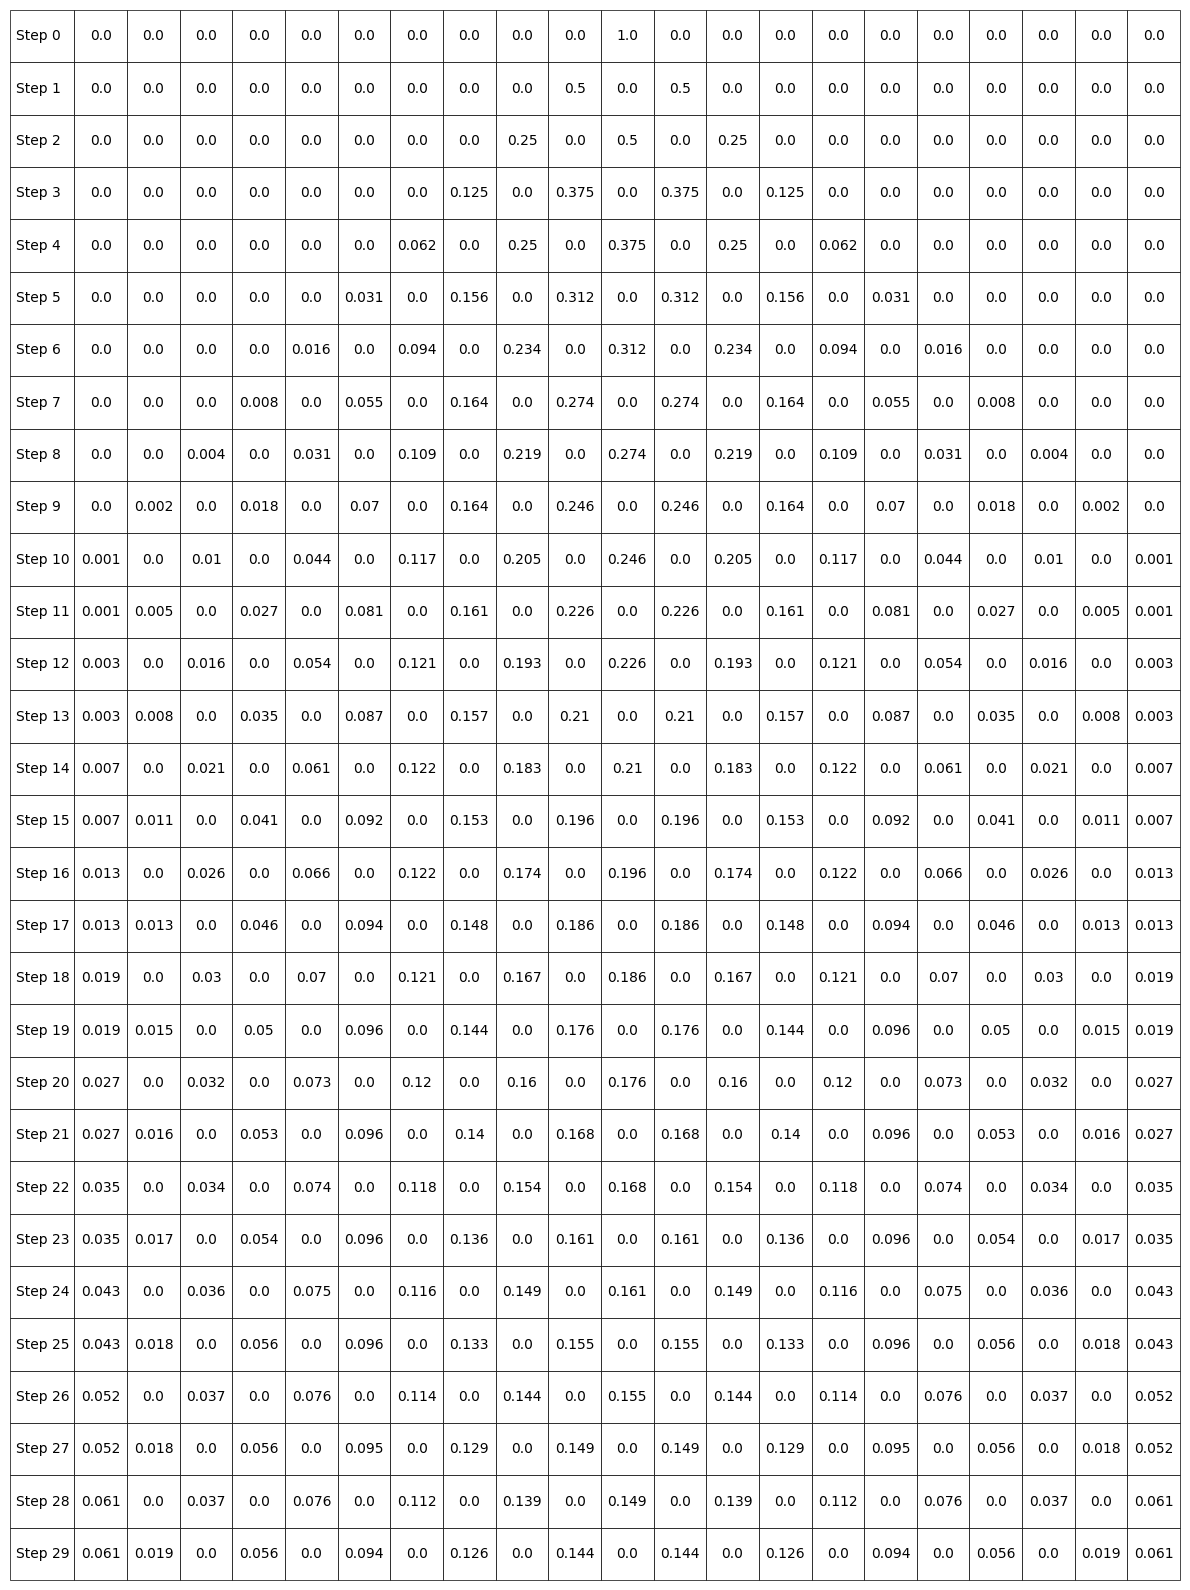

In [ ]:
promat = probability_tabel(steps = 30)#just for visualization i put steps = 30
plt.figure(figsize=(12, 16))
table = plt.table(
    cellText=np.round(promat,3),
    loc='center',
    cellLoc='center',
    rowLabels=[f'Step {i}' for i in range(len(promat))],
    bbox=[0, 0, 1, 1]
)

table.auto_set_font_size(False)
table.font_size = 10
table.scale(1.2, 1.2)
table.rowColours = ['lightblue'] * len(promat)
plt.axis('off')

for key, cell in table.get_celld().items():
    cell.set_linewidth(0.5)
    cell.set_edgecolor('black')
plt.tight_layout()
plt.show()


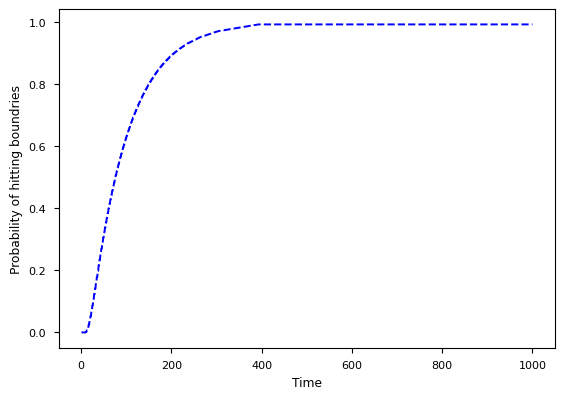

In [ ]:
promat = probability_tabel()
hit_probability = np.zeros(shape=len(promat), dtype= np.float16)
hit_probability = promat[:, 0] + promat[:, -1]
time = np.arange(1,len(promat)+1)

plt.plot(time, hit_probability, c='b',linestyle = '--')
plt.xlabel('Time')
plt.ylabel('Probability of hitting boundries')
plt.show()


In [ ]:
#now lets calculate the average lifespan
probability_of_death_at_each_time = [hit_probability[i]-hit_probability[i-1] for i in range(1,len(hit_probability))]
time = np.arange(1,len(hit_probability))
avg_lifespan = np.sum(time*probability_of_death_at_each_time)
print(avg_lifespan)

96.37213134765625


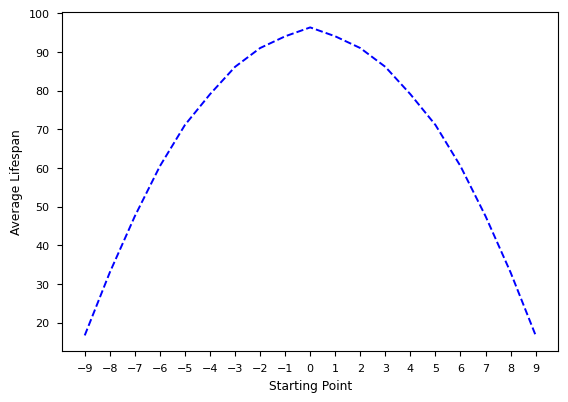

In [ ]:
lifespan = []
time = np.arange(1,len(promat))
for i in range(1,20):
  promat = probability_tabel(start=i - 10)
  hit_probability = np.zeros(shape=len(promat), dtype= np.float16)
  hit_probability = promat[:, 0] + promat[:, -1]
  probability_of_death_at_each_time = [hit_probability[i]-hit_probability[i-1] for i in range(1,len(promat))]
  avg_lifespan = np.sum(time*probability_of_death_at_each_time)
  lifespan.append(avg_lifespan)

starting_point = np.arange(-9,10)
plt.plot(starting_point, lifespan, c='b',linestyle = '--')
plt.xlabel('Starting Point')
plt.xticks(starting_point)
plt.ylabel('Average Lifespan')
plt.show()

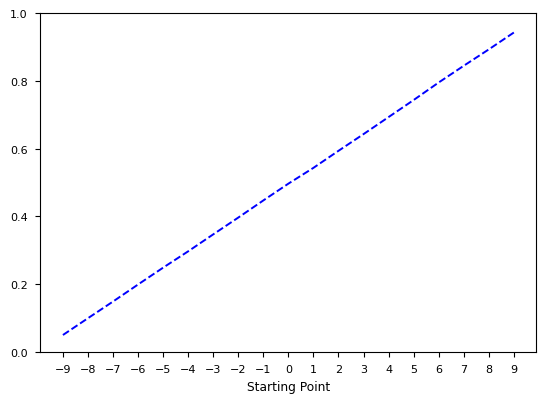

In [ ]:
#now lets plot the probability of hitting the right boundry

rightpro = []
for i in range(1,20):
  promat = probability_tabel(start=i - 10)
  hit_probability = np.zeros(shape=len(promat), dtype= np.float16)
  hit_probability = promat[-1, -1]
  rightpro.append(hit_probability)

plt.plot(starting_point, rightpro, c='b',linestyle = '--')
plt.xlabel('Starting Point')
plt.xticks(starting_point)
plt.yticks(np.linspace(0,1,6))
plt.show()

# **5.2D Random Walk**

In [ ]:
def random_walk2D(step=10000):
  a = [1, 2, 3, 4]
  cor = [[0, 0]]

  for i in range(step):
    x = np.random.choice(a)
    if x == 1:
      cor.append([1, 0])
    elif x == 2:
      cor.append([-1, 0])
    elif x == 3:
      cor.append([0, 1])
    else:
      cor.append([0, -1])
  cor = np.array(cor)
  return np.cumsum(cor, axis = 0)


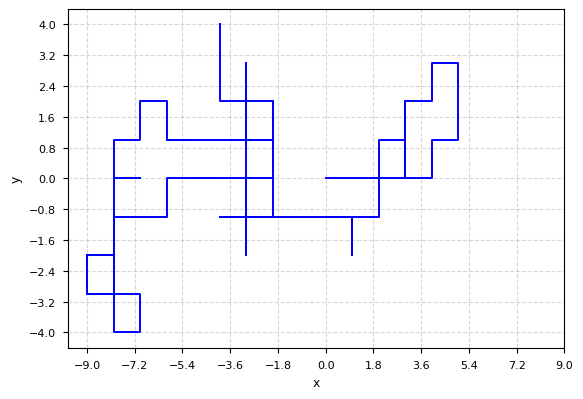

In [ ]:
position = random_walk2D(step = 100)
plt.plot(position[:,0], position[:,1], c='b', linestyle = '-', label='Trajectory')
plt.grid(True, linestyle='--', alpha=0.5)
x_min, x_max = -np.abs(position[:, 0]).max(), np.abs(position[:, 0]).max()
y_min, y_max = -np.abs(position[:, 1]).max(), np.abs(position[:, 1]).max()
plt.xticks(np.linspace(x_min, x_max, 11))
plt.yticks(np.linspace(y_min, y_max, 11))
plt.xlabel('x')
plt.ylabel('y')
plt.show()


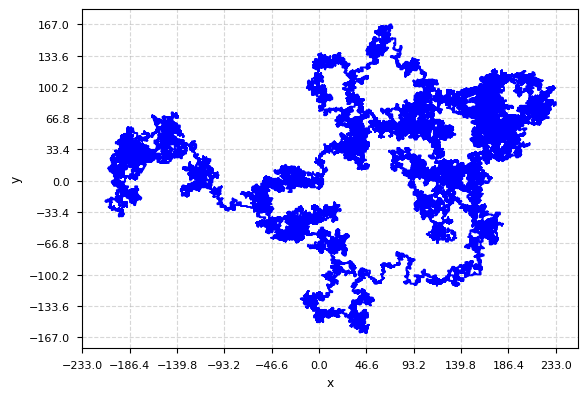

In [ ]:
position = random_walk2D(step = 100000)
plt.plot(position[:,0], position[:,1], c='b', linestyle = '-', label='Trajectory')
plt.grid(True, linestyle='--', alpha=0.5)
x_min, x_max = -np.abs(position[:, 0]).max(), np.abs(position[:, 0]).max()
y_min, y_max = -np.abs(position[:, 1]).max(), np.abs(position[:, 1]).max()
plt.xticks(np.linspace(x_min, x_max, 11))
plt.yticks(np.linspace(y_min, y_max, 11))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#now lets calcilate <r^2>
a = np.zeros(shape=(1001,2),dtype=np.float64)
for i in range(1000):#1000 walkers
  pos = random_walk2D(step=1000)
  a += pos**2
a /= 1000
avg_r2 = a[:, 0] + a[:, 1]


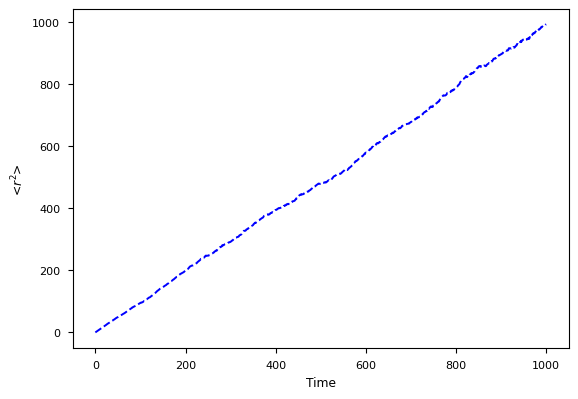

In [ ]:
steps = np.arange(1001)
plt.plot(steps, avg_r2, c='b',linestyle = '--')
plt.xlabel('Time')
plt.ylabel('<$r^2$>')
plt.show()

In [ ]:
model = LinearRegression()
model.fit(steps.reshape(-1, 1), avg_r2)
print(f'slope is {np.round(model.coef_[0],3)}')
#we expect from theory that slope shoulde be m=1(D=1/2 for our simulation)

slope is 0.991


# **6.Diffusion limited Aggregation (DLA)**

In [16]:
def random_walk2D(step=10000, xpos=0, ypos=0):
  a = [1, 2, 3, 4]
  cor = [[xpos, ypos]]

  for i in range(step):
    x = np.random.choice(a)
    if x == 1:
      cor.append([1, 0])
    elif x == 2:
      cor.append([-1, 0])
    elif x == 3:
      cor.append([0, 1])
    else:
      cor.append([0, -1])
  cor = np.array(cor)
  return np.cumsum(cor, axis = 0)

def DLA(n=5000, s=200):
    mat = np.zeros((s, s), dtype=np.uint32)  # uint8 is sufficient
    h = 0
    k = 0

    for k in range(n):
        posx, posy = np.random.randint(0, s), h + 3
        traj = random_walk2D(step=1000, xpos=posx, ypos=posy)#here we have trajectory of single particle
        for i in range(len(traj)):
          x, y = traj[i]
          if x < 0 or x >= s or y < 0 or y >= s:#boundry conditions
            break

          if y == 0:#hitting the floor
            mat[s-1, x] = k + 1
            h = max(h, 1)
            k += 1
            break
          elif y > 0 and (mat[s-1-(y-1), x] != 0 or (x > 0 and mat[s-1-y, x-1] != 0) or (x < s-1 and mat[s-1-y, x+1] != 0)):  # check if there is any particle below, to the right or to the left at each step
              mat[s-1-y, x] = k +1
              h = max(h, y + 1)
              k += 1
              break



    return mat

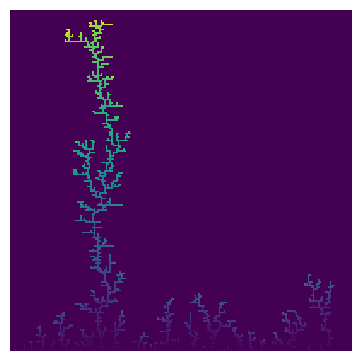

In [18]:
from matplotlib.colors import ListedColormap
mat = DLA(n=10000)
cmap = 'viridis'
plt.matshow(mat, cmap=cmap)
plt.axis('off')
plt.show()

## **7.DLA Growth from a single point**

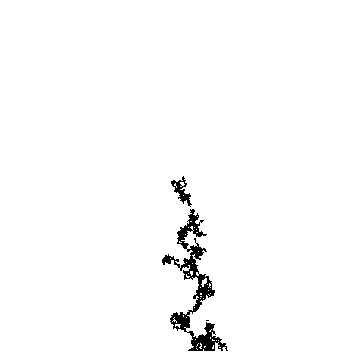

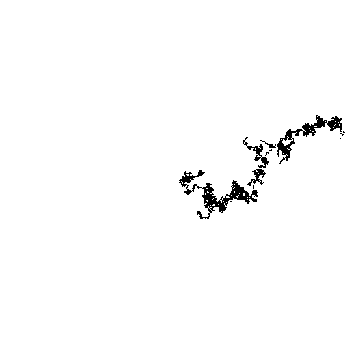

In [20]:
#here the proccess is the same as previuos problem only we have to grow it from a point


def DLA_frompoint(n=1000, s=200, boundary_shape='circle'):
    mat = np.zeros((s, s), dtype=np.uint16)
    center = s // 2
    mat[center, center] = 1
    h = 0 #for calculating radius of growth

    for k in range(2, n + 2):

        if boundary_shape == 'circle':
            angle =np.random.uniform(0, 2 * np.pi)
            radius = min(center - 1, h+5)  # for not getting out of bound i esed min function here
            posx = center + int(radius *np.cos(angle))
            posy = center + int(radius *np.sin(angle))
        else:  # square condition
            margin = min(center - 1, h+5)#again for not getting out of  bounds
            side = np.random.choice(['top', 'bottom', 'left', 'right'])
            if side == 'top':
                posx, posy = np.random.randint(center - margin, center + margin), center + margin
            elif side == 'bottom':
                posx, posy = np.random.randint(center - margin, center + margin), center - margin
            elif side == 'left':
                posx, posy = center - margin, np.random.randint(center - margin, center+margin)
            else:
                posx,posy = center+margin, np.random.randint(center-margin, center+margin)

        for x, y in random_walk2D(500,posx, posy).tolist():
            if x < 0 or x >= s or y < 0 or y >= s:
                break
            # Check 4-directional neighbors for sticking condition
            neighbors = [(0, -1), (0, 1), (-1, 0), (1, 0)]
            for dx, dy in neighbors:
                nx, ny = x + dx, y + dy
                if 0 <= nx < s and 0 <= ny < s:
                  if mat[int(ny), int(nx)] != 0:
                     if 0 <= x < s and 0 <= y < s:
                      mat[int(y), int(x)] = 1
                      h = max(h, np.sqrt((x - center)**2 + (y - center)**2))#updating the hieght
                      break
            else:
                continue

    return mat




mat = DLA_frompoint(n=4000,s= 450, boundary_shape='square')
cmap = 'binary'
plt.matshow(mat, cmap=cmap)
plt.axis('off')
plt.show()


mat = DLA_frompoint(n=1000,s =500)
cmap = 'binary'
plt.matshow(mat, cmap=cmap)
plt.axis('off')
plt.show()



# **8.Self-Avoiding Random Walk (SAW)**


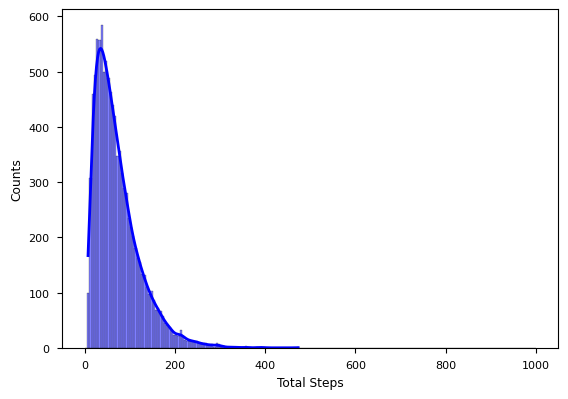

In [32]:
def random_walk2D(step=1000, xpos=0, ypos=0):
  pos = np.array([[xpos, ypos]])
  neigh = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
  visited = {tuple(pos[-1])}

  for i in range(step):
    nei = []#for saving unseen neighbors
    for x in neigh:
      n = pos[-1] + x
      if tuple(n) not in visited:
        nei.append(x)
    nei = np.array(nei)

    if 0 == len(nei):
      return i #returning total steps

    x = np.random.randint(len(nei))
    new_pos = pos[-1] + nei[x]
    visited.add(tuple(new_pos))
    pos = np.vstack((pos, new_pos))

  return step#if particle doesnt get trapped


total_steps = []
for i in range(10000):
  total_steps.append(random_walk2D(step=1000))

bins = bins = list(range(0, 1001, 5))
sns.histplot(total_steps, bins=bins, kde=True,color='b', line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2})
plt.xlabel('Total Steps')
plt.ylabel('Counts')
plt.show()

# **9.the Number of paths for SAW**

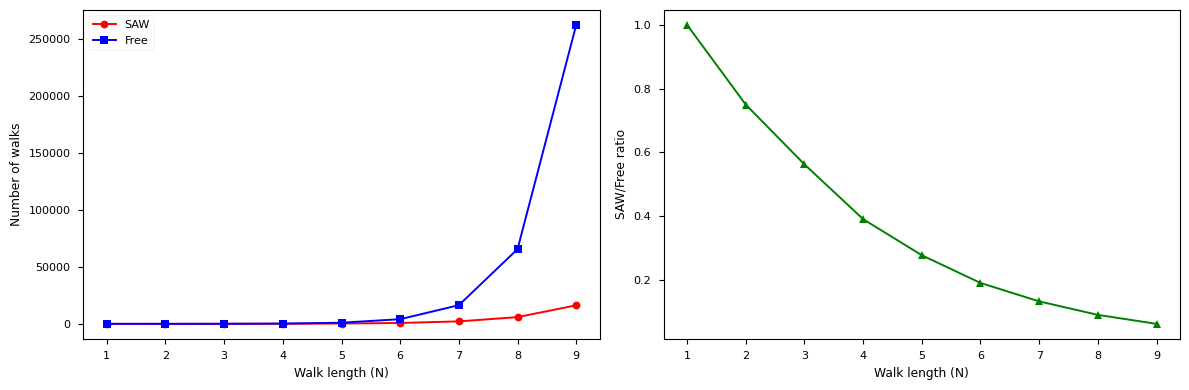

In [40]:
#here i count every possible RAW using recurssive function,which at each step calculates total possible ways from the beggining.
def generate_saws(N):
    if N == 0:
        return [np.array([[0, 0]])]

    walks = []
    for walk in generate_saws(N-1):
        last_pos =walk[-1]
        for d in [np.array([1,0]), np.array([-1,0]), np.array([0,1]), np.array([0,-1])]:
            new_pos =last_pos+d
            if not any(np.array_equal(new_pos, pos) for pos in walk):
                walks.append(np.vstack([walk, new_pos]))
    return walks



counts = {'SAW': [], 'Free': [], 'Ratio': []}

for N in range(1, 10):#only 20 steps
    saws = generate_saws(N)
    free_walks = 4**N
    counts['SAW'].append(len(saws))
    counts['Free'].append(free_walks)
    counts['Ratio'].append(len(saws)/free_walks)


plt.figure(figsize=(12, 4))

#lets compare free random Walk vs SAW
plt.subplot(121)
plt.plot(range(1,10), counts['SAW'], 'ro-', label='SAW')
plt.plot(range(1,10), counts['Free'], 'bs-', label='Free')
plt.xlabel('Walk length (N)')
plt.ylabel('Number of walks')
plt.legend()

# Ratio plot
plt.subplot(122)
plt.plot(range(1,10), counts['Ratio'], 'g^-')
plt.xlabel('Walk length (N)')
plt.ylabel('SAW/Free ratio')

plt.tight_layout()
plt.show()

